1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def fconv(choice,x):
    if choice == "bin":
        return bin(x)
    elif choice == "hex":
        return hex(x)
    elif choice == "dec":
        return int(x)
    else:
        print("Wrong choice!")

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [22]:
def fsinglepres(x):
    
    mant = 1
    for i in range(1,23):    
        mant += int(x[8+i])*2**(-i)
       
    return (-1)**int(x[0])*mant*2**(int(x[1:9],2)-127)

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [7]:
def fover():
    r   = 1.
    rem = 1.
    while r != float("inf"):
        rem = r
        r  *= 2.
    return rem
print(fover())
def funder():
    r   = 1.
    rem = 1.
    while r != 0:
        rem = r
        r  /= 2.
    return rem
print(funder())

8.98846567431158e+307
5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [28]:
def fepsilon():
    r    = 0.5
    srem = 0.
    while (1-srem) != 0:
        a     = srem
        srem += r
        r    /=2
    return 1-a
fepsilon()


1.1102230246251565e-16

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

# a)

In [1]:
def fquadratic1(a,b,c):
    den   = 2*a
    den   = 1/den
    delta = (b**2 -4*a*c)**0.5
    return ((-b+delta)*den ,(-b-delta)*den)
a = 0.001
b = 1000
c = 0.001
print(fquadratic(a,b,c))

(-9.999894245993346e-07, -999999.999999)


# b)

In [26]:
def fquadratic2(a,b,c):
    x1 = -(2*c)/(b+(b**2-4*a*c)**0.5)
    x2 = (2*c)/(-b+(b**2-4*a*c)**0.5)
    return (x1,x2)

a = 0.001
b = 1000
c = 0.001
print(fquadratic(a,b,c))

(-1.000000000001e-06, -1000010.5755125057)


# c)

In [ ]:
def fquadratic3(a,b,c):
    if b/a > 1000:
        x1 = -(2*c)/(b+(b**2-4*a*c)**0.5)
        x2 = (2*c)/(-b+(b**2-4*a*c)**0.5)
        return (x1,x2)
    else:
        den   = 2*a
        den   = 1/den
        delta = (b**2 -4*a*c)**0.5
        return ((-b+delta)*den ,(-b-delta)*den)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

The accuracy increase a little in range [3,5], after $5$ it decreases.


# Function $f(x)$

In [2]:
def f(x):
    return x*(x-1)

# Derivative function

In [3]:
def fderivative(f,x,delta):
    return (f(x+delta)-f(x))/delta

# True derivative

In [4]:
def fdertrue(x):
    return 2*x-1

# a)

In [5]:
print(abs(fderivative(f,1,10**(-2))-fdertrue(1)))

0.010000000000000897


# b)

[9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.284037100736441e-08, 8.890058334132256e-05, 0.0007992778373491216]


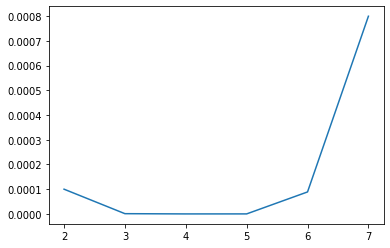

In [7]:
import matplotlib.pyplot as plt
out= [abs(fderivative(f,1,10**(-2*x))-fdertrue(1)) for x in range (2,8) ]
print(out)
plt.plot(range(2,8),out)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute?

(a) 0.0056

(b) (8333333,409000000)


# Function of semicircle

In [8]:
def fsemic(x):
    return (1-x*x)**0.5

# Riemann Integral function

In [12]:
def fintegr(f,a,b,N):
    h = (b-a)/N
    s = 0
    x = a 
    for i in range(1,N):
        s += h*f(x)
        x += h
    return s
print(abs(fintegr(fsemic,-1,1,100)- pi/2))

0.0056420209940735155


In [11]:
from time import time
from math import pi

t1 = time()
x  = abs(fintegr(fsemic,-1,1,409000000)- pi/2)
t2 = time()
print(t2-t1)

60.807653188705444


In [29]:
t1 = time()
x  = abs(fintegr(fsemic,-1,1,8333333)- pi/2)
t2 = time()
print(t2-t1)

1.1484034061431885
